In [1]:
import sys
import os
os.chdir("..")
sys.path.append(os.getcwd() + '/src')

from elisa.conf import config
config.LOG_CONFIG = os.getcwd() + 'jupyter_tutorials/logging.json'

/home/miro/ELISa/src/elisa/conf/config.py:161: UserWarning: path /home/miro/ELISa/atmosphere/ck93
to kurucz 1993 atmosphere atlas doesn't exists
Specifiy it in elisa_conf.ini file
  "Specifiy it in elisa_conf.ini file".format(K93_ATM_TABLES))


# Demo No. 6 - Producing synthetic light curves

This demo will finally provide a quick guide trough a process of generating light curves.

## Defining a binary system

In this stage, we will define a binary model as usual:

In [2]:
from elisa.binary_system.system import BinarySystem
from elisa.base.star import Star
from astropy import units as u


primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=3.6,
    synchronicity=1.0,
    t_eff=10000 * u.K,
    gravity_darkening=1.0,
    discretization_factor=5,  # angular size (in degrees) of the surface elements
    albedo=0.6,
    metallicity=0.0,
)

secondary = Star(
    mass=1.2 * u.solMass,
    surface_potential=4.0,
    synchronicity=1.0,
    t_eff=7000 * u.K,
    gravity_darkening=1.0,
    # discretization_factor=20,
    albedo=0.6,
    metallicity=0,
)

bs = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=2.5 * u.d,
    eccentricity=0.0,
    inclination=85 * u.deg,
    primary_minimum_time=2440000.0 * u.d,
    phase_shift=0.0,
)

INFO:BinarySystem:initialising object BinarySystem
INFO:BinarySystem:Setting discretization factor of secondary component to 8.17 as a according to discretization factor of the primary component 


## Defining observer class instance

In order to be able to specify observer-dependent parameters of the light curve such as passband we have to define `Observer` class: 

In [3]:
from elisa.observer.observer import Observer

o = Observer(passband=[  # defining passbands at which calculate a light curve
#     'Generic.Bessell.U',
    'Generic.Bessell.B',
    'Generic.Bessell.V',
    'Generic.Bessell.R',
    'Generic.Bessell.I',
                      ],
             system=bs)  # specifying the binary system to use in light curve synthesis

INFO:Observer:initialising Observer instance


List of all available passbands can be found in ... . `Observer` enables to perform ''observations''. Synthetic light curve of our binary system can be produced using function on our `Observer` class instance: 

In [4]:
phases, curves = o.observe(
    from_phase=-0.6,
    to_phase=0.6,
    phase_step=0.01,
                  )

INFO:Observer:observation start w/ following configuration {<add>}
INFO:BinarySystem:Implementing light curve generator function for synchronous binary system with circular orbit or circular assynchronous systems without spots.
INFO:Observer:observation finished


This function returns `phases` in which synthetic light curves were produced and `curves` dictionary with synthetic light curves for every passband specifyied in `observer` class.

In [5]:
curves

{'Generic.Bessell.B': array([ 91949874.24512613,  91699412.6392843 ,  91100955.11100501,
         89976020.11154453,  88506059.92881364,  86837057.99789995,
         85176926.24150376,  83734854.51730463,  82788820.49323225,
         82603749.85462788,  82585482.97949541,  82603749.85462788,
         82788820.49323225,  83734854.51730463,  85176926.24150376,
         86837057.99789995,  88506059.92881364,  89976020.11154453,
         91100955.11100501,  91699412.6392843 ,  91949874.24512613,
         92220943.75406596,  92510701.12859029,  92805233.68317758,
         93103612.56091781,  93410181.4561457 ,  93712232.92064628,
         94001255.99866244,  94280079.17352836,  94538692.60449231,
         94766168.69938473,  94965868.15898898,  95128686.64279714,
         95241988.09201065,  95314728.59324627,  95334926.69407126,
         95300265.45730756,  95209736.71866639,  95070021.2057578 ,
         94871876.24382529,  94623866.3971386 ,  94329804.9235131 ,
         93991864.78658724,

## Visualizing the results

Resulting light curves can be visualized in very similarly as in the case of `BinarySystem` instance:

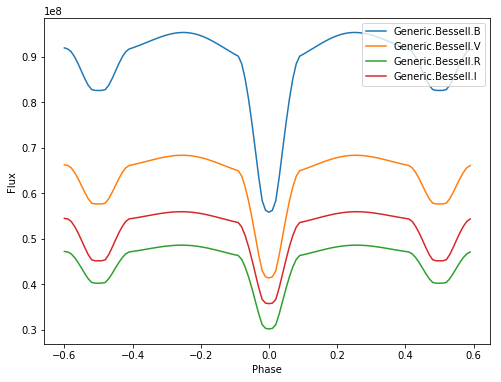

In [6]:
o.plot.light_curve(phases=phases, curves=curves)

## Introducing pulsations

One of the main goals of this software package is to generate light curves of the oscillating eclipsing binaries (oEB). Therefore lets demonstrate this capability by introducing pulsations into our binary system `bs`:

In [13]:
pulsations_primary = [
        {
            'l': 1,
            'm': 1,
            'amplitude': 50 * u.K,
            'frequency': 16 / u.d,
            'start_phase': 1.5,
#             'mode_axis_theta': 15 * u.deg,
#             'mode_axis_phi': 90 * u.deg,
        },
]

primary.pulsations = pulsations_primary
bs.init()

INFO:PulsationMode:initialising object PulsationMode
INFO:BinarySystem:initialising object BinarySystem
INFO:BinarySystem:Setting discretization factor of secondary component to 8.17 as a according to discretization factor of the primary component 


Our primary component now contains one dipole mode. We can use the same set of commands to produce synthetic light curves and visualize the results (it may take a while): 

INFO:Observer:observation start w/ following configuration {<add>}
INFO:BinarySystem:Implementing light curve generator function for synchronous binary system with circular orbit or circular assynchronous systems without spots.
INFO:Observer:observation finished


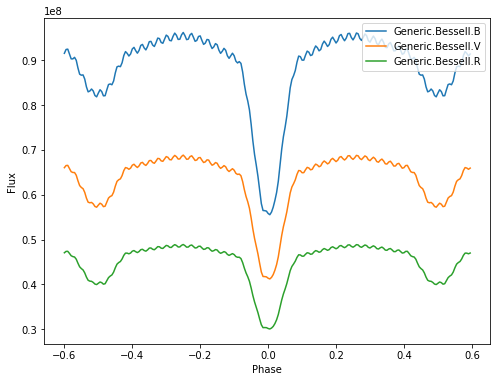

In [14]:
phases_with_pulsations, curves_with_pulsations = o.observe(
    from_phase=-0.6,
    to_phase=0.6,
    phase_step=0.005,
)

o.plot.light_curve(phases=phases_with_pulsations, curves=curves_with_pulsations)